In [1]:
import pandas as pd
import numpy as  np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import random
from sklearn.model_selection import train_test_split
from google.colab import files
#tf.compat.v1.enable_eager_execution()
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 10)

In [18]:
# !rm -rf Design1a*
# files.upload()
data1 = pd.read_csv("Design1a_Para2_S21.csv")
data2 = pd.read_csv("Design1a_dataset3_g1 para.csv")
data3 = pd.read_csv("Design1a_dataset4_g1 para.csv")

In [19]:
data2 = data2.drop(columns=data2.columns[0],axis=1)
data3 = data3.drop(columns=data3.columns[0],axis=1)
data = pd.concat([data1, data2, data3],axis=1)
#data = data1
data_points_initially = data.shape[1]-1

In [20]:
def input_parameters(data):
    output=np.empty((0,4), float)
    for columns in data.columns[1:]:
        params=columns.split(' ')[3:]
        param=[]
        for vals in params:
            param.append(float(vals.split('=')[1][1:-3]))
        param=np.array([param])
        output=np.concatenate((output, param), axis=0)
    return output

In [21]:
def clean_data(data):
  data=data.replace([-np.inf], np.nan)
  data=data.dropna(axis=1, how='all')
  data.isnull().to_numpy().any()
  drop_columns = []
  data = data.drop(columns=drop_columns)
  return data

In [22]:
data = clean_data(data)
X = input_parameters(data)
X

array([[ 2.  ,  0.  ,  1.  ,  0.5 ],
       [ 2.  ,  0.  ,  2.  ,  0.5 ],
       [ 2.  ,  0.  ,  3.  ,  0.5 ],
       ...,
       [28.  ,  0.5 ,  3.  ,  1.25],
       [29.  ,  0.5 ,  3.  ,  1.25],
       [30.  ,  0.5 ,  3.  ,  1.25]])

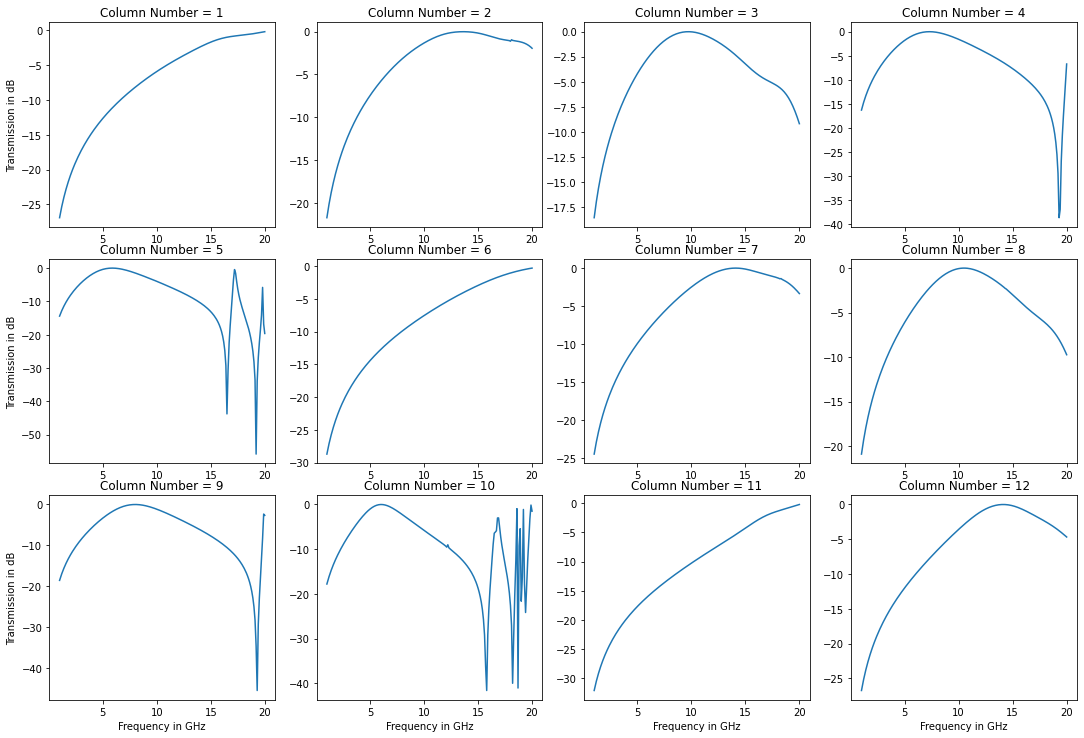

In [23]:
rows = 3
columns = 4
fig, window =  plt.subplots(rows, columns, figsize=(15,10))
fig.tight_layout()
for x in range(0,rows):
    for y in range(0, columns):
        index=1+x*columns+y
        window[x][y].title.set_text("Column Number = %d" % index)
        window[x][y].plot(data.iloc[:, 0], data.iloc[:, index])
plt.setp(window[-1, :], xlabel='Frequency in GHz');
plt.setp(window[:, 0], ylabel='Transmission in dB');

In [24]:
data

,Freq [GHz],"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='1mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='2mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='3mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='4mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='5mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='1mm' s2='1mm'",...,"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='25mm' g2='0.5mm' s1='3mm' s2='1.25mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='25mm' g2='0.5mm' s1='3mm' s2='1.25mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='26mm' g2='0.5mm' s1='3mm' s2='1.25mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='27mm' g2='0.5mm' s1='3mm' s2='1.25mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='28mm' g2='0.5mm' s1='3mm' s2='1.25mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='29mm' g2='0.5mm' s1='3mm' s2='1.25mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='30mm' g2='0.5mm' s1='3mm' s2='1.25mm'"
0,1.0,-26.899047,-21.738253,-18.556836,-16.289351,-14.415687,-28.692293,...,-7.265652,-5.645212,-5.204043,-4.464106,-4.266679,-3.766259,-3.434368
1,1.1,-26.068833,-20.907403,-17.723808,-15.450868,-13.571228,-27.861928,...,-6.485358,-4.606957,-3.937370,-3.403295,-3.211120,-3.072333,-2.791153
2,1.2,-25.310477,-20.148358,-16.962408,-14.683555,-12.797495,-27.103407,...,-5.689933,-3.728026,-3.057601,-2.671631,-2.502974,-2.472662,-2.259897
3,1.3,-24.612427,-19.449567,-16.261093,-13.975885,-12.083003,-26.405176,...,-4.918349,-3.001734,-2.427417,-2.143363,-2.005741,-1.967932,-1.825790
4,1.4,-23.965701,-18.802051,-15.610893,-13.318908,-11.418845,-25.758255,...,-4.194210,-2.415776,-1.963066,-1.748497,-1.641100,-1.553973,-1.475002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,19.6,-0.321875,-1.548532,-7.952840,-21.568599,-18.472182,-0.438480,...,-0.066864,-0.431685,-0.195567,-1.824989,-0.232562,-0.685281,-0.110212
187,19.7,-0.293934,-1.631440,-8.234867,-17.505902,-14.123273,-0.407896,...,0.608630,-0.096940,-0.244043,-0.399914,-0.386374,-0.996297,-0.192498
188,19.8,-0.266269,-1.725217,-8.533635,-13.911005,-5.799198,-0.378492,...,-2.031433,-0.006268,-0.327730,-3.521001,-0.055126,-0.861759,-0.032996
189,19.9,-0.239161,-1.830872,-8.848792,-10.397368,-16.825132,-0.350309,...,-0.139061,-1.362638,-0.489126,-0.148383,-7.943026,0.157250,-0.160805


In [25]:
new_input = []
for rx in X:
  for ry in data.index:
    dims = list(rx)
    dims.append(data.iloc[ry,0])
    new_input.append(dims)
new_input

new_output = []
for col in range(1, data.shape[1]):
  for row in data.index:
    new_output.append(-1*data.iloc[row, col])
print(new_input[191:2000])
print(new_output[191:200])

[[2.0, 0.0, 2.0, 0.5, 1.0], [2.0, 0.0, 2.0, 0.5, 1.1], [2.0, 0.0, 2.0, 0.5, 1.2], [2.0, 0.0, 2.0, 0.5, 1.3], [2.0, 0.0, 2.0, 0.5, 1.4], [2.0, 0.0, 2.0, 0.5, 1.5], [2.0, 0.0, 2.0, 0.5, 1.6], [2.0, 0.0, 2.0, 0.5, 1.7], [2.0, 0.0, 2.0, 0.5, 1.8], [2.0, 0.0, 2.0, 0.5, 1.9], [2.0, 0.0, 2.0, 0.5, 2.0], [2.0, 0.0, 2.0, 0.5, 2.1], [2.0, 0.0, 2.0, 0.5, 2.2], [2.0, 0.0, 2.0, 0.5, 2.3], [2.0, 0.0, 2.0, 0.5, 2.4], [2.0, 0.0, 2.0, 0.5, 2.5], [2.0, 0.0, 2.0, 0.5, 2.6], [2.0, 0.0, 2.0, 0.5, 2.7], [2.0, 0.0, 2.0, 0.5, 2.8], [2.0, 0.0, 2.0, 0.5, 2.9], [2.0, 0.0, 2.0, 0.5, 3.0], [2.0, 0.0, 2.0, 0.5, 3.1], [2.0, 0.0, 2.0, 0.5, 3.2], [2.0, 0.0, 2.0, 0.5, 3.3], [2.0, 0.0, 2.0, 0.5, 3.4], [2.0, 0.0, 2.0, 0.5, 3.5], [2.0, 0.0, 2.0, 0.5, 3.6], [2.0, 0.0, 2.0, 0.5, 3.7], [2.0, 0.0, 2.0, 0.5, 3.8], [2.0, 0.0, 2.0, 0.5, 3.9], [2.0, 0.0, 2.0, 0.5, 4.0], [2.0, 0.0, 2.0, 0.5, 4.1], [2.0, 0.0, 2.0, 0.5, 4.2], [2.0, 0.0, 2.0, 0.5, 4.3], [2.0, 0.0, 2.0, 0.5, 4.4], [2.0, 0.0, 2.0, 0.5, 4.5], [2.0, 0.0, 2.0, 0.5, 4.6], 

In [32]:
trans_cutoff = -8
input_vals = []
output_vals = []
for column in range(1, data.shape[1]):
  freq_vals = []
  first_cutoff_found = False
  for index in range(1, data.shape[0]):
    prev = data.iloc[index-1,column]
    curr = data.iloc[index,column]
    if prev < trans_cutoff and curr >= trans_cutoff:
      freq_vals.append(data.iloc[index,0])
      output_vals.append(curr)
    elif prev >= trans_cutoff and curr < trans_cutoff:
      if len(freq_vals) > 0:
        break
      else:
        continue
    elif len(freq_vals) > 0:
      freq_vals.append(data.iloc[index,0])
      output_vals.append(curr)
  for freq in freq_vals:
    params = list(X[column-1])
    params.append(freq)
    input_vals.append(params)
output_vals = [-1*x for x in output_vals]
print(input_vals[7:30])
print(output_vals[7:30])
print(len(input_vals)==len(output_vals))
print(len(input_vals))

[[2.0, 0.0, 1.0, 0.5, 8.9], [2.0, 0.0, 1.0, 0.5, 9.0], [2.0, 0.0, 1.0, 0.5, 9.1], [2.0, 0.0, 1.0, 0.5, 9.2], [2.0, 0.0, 1.0, 0.5, 9.3], [2.0, 0.0, 1.0, 0.5, 9.4], [2.0, 0.0, 1.0, 0.5, 9.5], [2.0, 0.0, 1.0, 0.5, 9.6], [2.0, 0.0, 1.0, 0.5, 9.7], [2.0, 0.0, 1.0, 0.5, 9.8], [2.0, 0.0, 1.0, 0.5, 9.9], [2.0, 0.0, 1.0, 0.5, 10.0], [2.0, 0.0, 1.0, 0.5, 10.1], [2.0, 0.0, 1.0, 0.5, 10.2], [2.0, 0.0, 1.0, 0.5, 10.3], [2.0, 0.0, 1.0, 0.5, 10.4], [2.0, 0.0, 1.0, 0.5, 10.5], [2.0, 0.0, 1.0, 0.5, 10.6], [2.0, 0.0, 1.0, 0.5, 10.7], [2.0, 0.0, 1.0, 0.5, 10.8], [2.0, 0.0, 1.0, 0.5, 10.9], [2.0, 0.0, 1.0, 0.5, 11.0], [2.0, 0.0, 1.0, 0.5, 11.1]]
[7.11274447253561, 6.99958020516679, 6.8874704437826, 6.77640304144056, 6.66636657340181, 6.55735021004593, 6.449343587328111, 6.342336675448821, 6.2363196465007995, 6.1312827419568094, 6.027216140966329, 5.92410983053979, 5.821953478813831, 5.720736312711789, 5.6204470014365, 5.52107354735706, 5.4226031859744594, 5.32502229676951, 5.22831632684687, 5.132469729385

In [46]:
def split(inp, op):
  return train_test_split(inp, op, test_size=0.2,
                          random_state=42,
                          shuffle=True)
def learn(epochs, seed=0):
  #tf.random.set_seed(seed)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(16,input_shape=(5,),activation='tanh'))
  model.add(tf.keras.layers.Dense(128,activation='tanh'))
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dense(1024,activation='relu'))
  model.add(tf.keras.layers.Dense(1024,activation='relu'))
  model.add(tf.keras.layers.Dense(1,activation='relu'))
  model.compile(loss=tf.keras.losses.LogCosh(), optimizer='adam')
  history=model.fit(X_train, y_train, validation_split=0.25, epochs=epochs,
                    verbose=1, shuffle=True, batch_size=512)
  return model, history

In [47]:

X_train, X_test, y_train, y_test = split(new_input, new_output)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train
model, history = learn(350, 150)

Epoch 1/350
134/134 [==============================] - 1s 5ms/step - loss: 2.7461 - val_loss: 2.3725
Epoch 2/350
134/134 [==============================] - 0s 4ms/step - loss: 2.1006 - val_loss: 1.9090
Epoch 3/350
134/134 [==============================] - 1s 4ms/step - loss: 1.7759 - val_loss: 1.6658
Epoch 4/350
134/134 [==============================] - 1s 4ms/step - loss: 1.5364 - val_loss: 1.4621
Epoch 5/350
134/134 [==============================] - 1s 4ms/step - loss: 1.3578 - val_loss: 1.4596
Epoch 6/350
134/134 [==============================] - 1s 4ms/step - loss: 1.3269 - val_loss: 1.5892
Epoch 7/350
134/134 [==============================] - 1s 4ms/step - loss: 1.2584 - val_loss: 1.3204
Epoch 8/350
134/134 [==============================] - 0s 4ms/step - loss: 1.2565 - val_loss: 1.3966
Epoch 9/350
134/134 [==============================] - 1s 4ms/step - loss: 1.2519 - val_loss: 1.4549
Epoch 10/350
134/134 [==============================] - 1s 4ms/step - loss: 1.2151 - val_lo

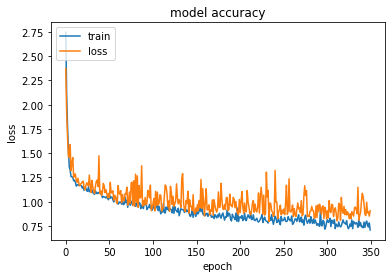

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

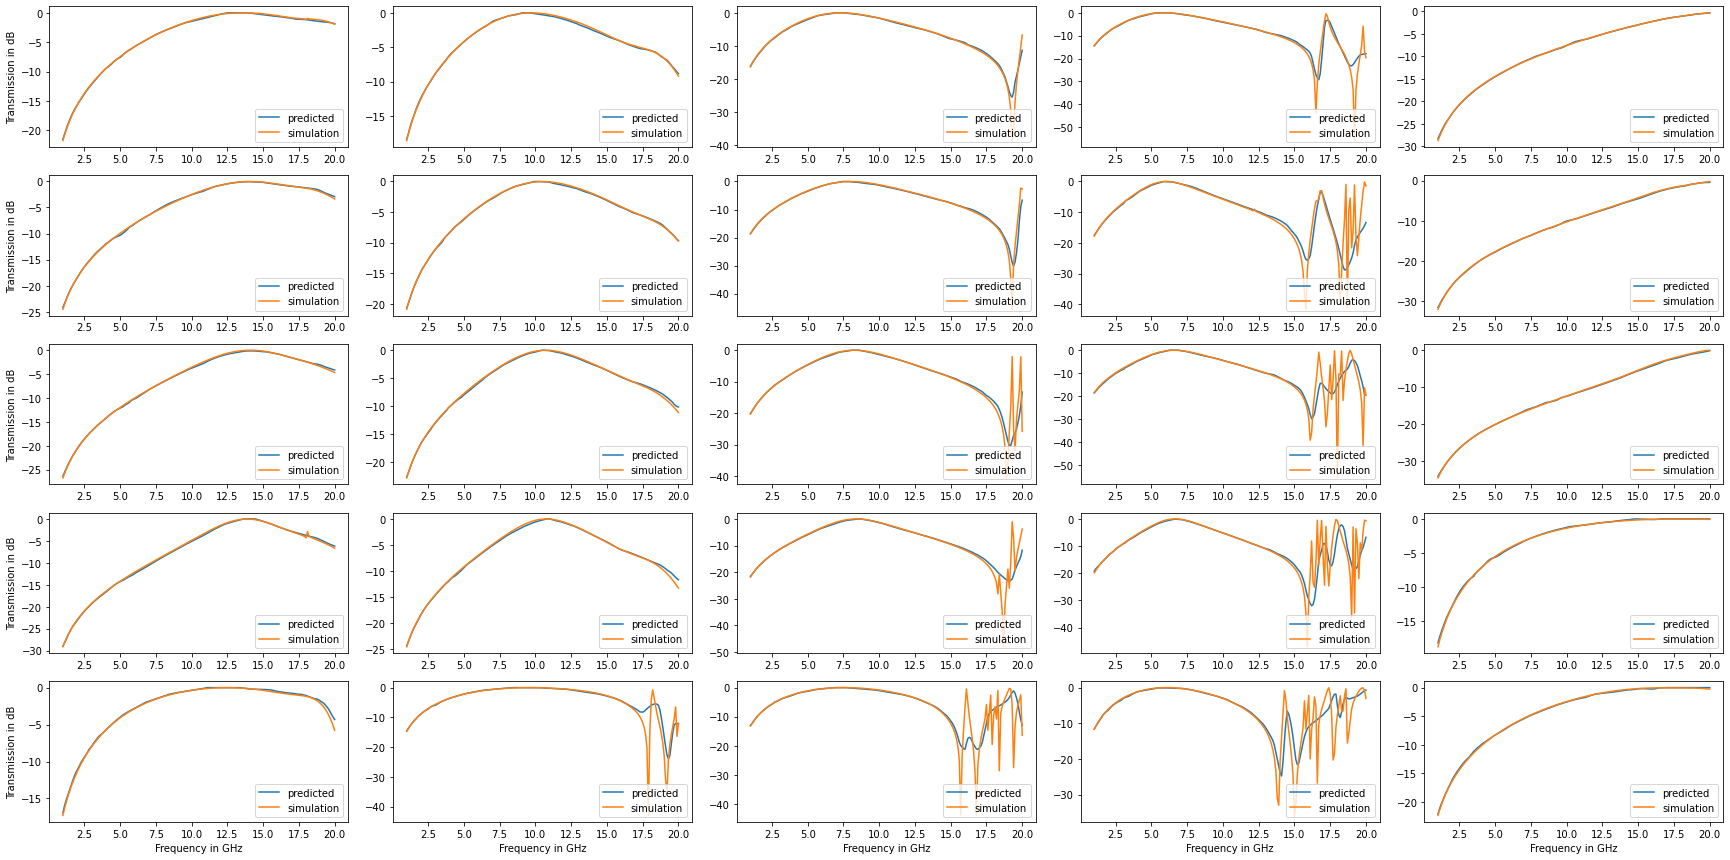

In [206]:
rows = 5
columns = 5
fig, window =  plt.subplots(rows, columns, figsize=(30,15))
plt.subplots_adjust(wspace=0.15, hspace=0.20)
for number in range(0, rows*columns):
  col = number % columns
  row = number // columns
  number = number + 1
  outputs = model.predict(new_input[(number)*191:(number+1)*191])
  window[row][col].plot(np.arange(1, 20.1, 0.1),-1*outputs, label='predicted')
  window[row][col].plot(np.arange(1, 20.1, 0.1),-1*np.array((new_output[number*191:(number+1)*191])), label='simulation')
  window[row][col].legend(loc ="lower right") 
  plt.setp(window[-1, :], xlabel='Frequency in GHz')
  plt.setp(window[:, 0], ylabel='Transmission in dB')

In [117]:
def get_cutoffs(inp, op):
  trans_cutoff = -0.45
  tot_freqs = 191
  output_data = []
  input_dims = []
  designs = len(inp) // tot_freqs
  for design in range(0, designs):
    cutoff_index_curr = []
    first_cutoff_found = False
    for freq_index in range(1, tot_freqs):
      element = design*tot_freqs + freq_index
      prev = -1*op[element-1]
      curr = -1*op[element]
      if prev < trans_cutoff and curr >= trans_cutoff \
      and not first_cutoff_found:
        cutoff_index_curr.append(element)
        first_cutoff_found = True
      if prev >= trans_cutoff and curr < trans_cutoff \
      and first_cutoff_found:
        cutoff_index_curr.append(element-1)
        first_cutoff_found = False
    if len(cutoff_index_curr) <= 1:
      continue
    cutoff_index_curr = cutoff_index_curr[0:2]
    output_data.append([inp[cutoff_index_curr[0]][4], inp[cutoff_index_curr[1]][4]])
    input_dims.append([inp[cutoff_index_curr[0]][x] for x in range(0, 4)])
  return input_dims, output_data

In [146]:
from sklearn.metrics import mean_absolute_error as mae
pred_output = model.predict(new_input)
dims1, sim_cutoffs = get_cutoffs(new_input, new_output)
dims2, pred_cutoffs = get_cutoffs(new_input, pred_output)
f1 = []
f2 = []
for index1 in range(0, len(dims1)):
  for index2 in range(0, len(dims2)):
    if dims1[index1] == dims2[index2]:
      f1.append([sim_cutoffs[index1][0], pred_cutoffs[index2][0]])
      f2.append([sim_cutoffs[index1][1], pred_cutoffs[index2][1]])
print(f1)
print(f2)
f1 = np.array(f1)
f2 = np.array(f2)
fe1 = mae(f1[:,0], f1[:,1])
fe2 = mae(f2[:,0], f2[:,1])
print(fe1, fe2)

[[11.5, 11.7], [8.2, 8.2], [6.2, 6.3], [5.0, 5.0], [12.5, 12.6], [9.1, 9.2], [7.0, 7.0], [5.4, 5.6], [12.9, 13.3], [9.6, 9.8], [7.4, 7.5], [5.9, 6.1], [13.0, 13.2], [9.8, 10.2], [7.6, 7.9], [6.1, 6.3], [9.8, 9.8], [7.4, 7.4], [5.9, 6.0], [4.8, 5.0], [10.2, 10.5], [8.1, 8.2], [6.5, 6.5], [5.3, 5.3], [14.0, 14.1], [10.8, 10.9], [8.5, 8.7], [6.8, 7.0], [5.5, 5.6], [13.8, 14.2], [10.9, 11.4], [8.7, 9.0], [7.0, 7.1], [5.8, 5.9], [8.1, 8.0], [6.6, 6.5], [5.4, 5.3], [4.5, 4.6], [10.8, 10.4], [8.6, 8.5], [7.2, 6.9], [5.9, 5.8], [5.0, 4.9], [10.8, 10.8], [9.0, 9.0], [7.5, 7.4], [6.2, 6.2], [5.2, 5.3], [10.7, 10.9], [9.1, 9.2], [7.7, 7.6], [6.4, 6.4], [5.4, 5.4], [8.1, 8.1], [6.9, 6.9], [5.8, 5.6], [4.9, 4.7], [3.9, 3.9], [8.5, 8.8], [7.3, 7.4], [6.2, 6.2], [5.3, 5.3], [4.4, 4.5], [8.7, 8.9], [7.6, 7.7], [6.6, 6.6], [5.6, 5.7], [4.6, 4.7], [8.8, 8.9], [7.7, 7.8], [6.7, 6.8], [5.8, 5.7], [5.0, 5.0], [6.4, 6.6], [5.7, 5.8], [4.7, 4.5], [4.3, 4.2], [3.7, 3.5], [7.1, 7.1], [6.2, 6.2], [5.3, 5.2], [4

In [87]:
g1_range = np.arange(0.5, 12.1, 0.75)
g2_range = np.arange(0.0, 3.1, 0.25)
s1_range = np.arange(0.25, 7.1, 0.5)
s2_range = np.arange(0.1, 3.1, 0.25)
freq_range = np.arange(1, 20.1, 0.1)
combs = []
for x in g1_range:
  for y in g2_range:
    for z in s1_range:
      for w in s2_range:
        for f in freq_range:
          arr = [x, y, z, w, f]
          combs.append(arr)
combs=np.array(combs)
print("total_points = %d" % combs.shape[0])

total_points = 6674304


In [147]:
output = model.predict(combs)

In [200]:
#dims, cutoffs = get_cutoffs(combs, output)
print(dims)
print(cutoffs)

In [149]:
def find_best_match(frequencies, sizes, input):
  min_error = 100
  index = -1
  for ind, frequency in enumerate(frequencies):
    error = (abs(frequency[0]-input[0])+abs(frequency[1]-input[1]))/2
    if error < min_error:
      min_error = error
      index = ind
  e1 = abs(frequencies[index][0]-input[0])
  e2 = abs(frequencies[index][1]-input[1])
  return sizes[index], min_error, e1, e2

In [201]:
test_loss = 0.15
inps = np.array([[2,4],[3,5],[6,8],[8,10],[10,12],[12,14],[14,16],[16,18],[8,12],[6,14],[8,18]], dtype=np.float)
for index, input in enumerate(inps):
  op1 = find_best_match(cutoffs, dims,  input)
  op2 = find_best_match(sim_cutoffs, dims1,  input)
  if op2[1] < op1[1] or op2[1] < test_loss:
    op1 = op2
  print('[%4.1f, %4.1f]' % tuple(inps[index]), '[%5.2f, %5.2f, %5.2f, %5.2f]' % tuple(op1[0][0:4]), 'eea = %0.2f, ee1 = %0.2f ee2 = %0.2f' %op1[1:4])

[ 2.0,  4.0] [26.00,  0.50,  3.00,  1.25] eea = 0.40, ee1 = 0.30 ee2 = 0.50
[ 3.0,  5.0] [19.00,  0.50,  3.00,  1.25] eea = 0.25, ee1 = 0.40 ee2 = 0.10
[ 6.0,  8.0] [10.00,  0.50,  3.00,  2.00] eea = 0.15, ee1 = 0.20 ee2 = 0.10
[ 8.0, 10.0] [ 2.00,  1.75,  3.75,  0.85] eea = 0.00, ee1 = 0.00 ee2 = 0.00
[10.0, 12.0] [ 2.00,  1.50,  3.00,  1.50] eea = 0.10, ee1 = 0.20 ee2 = 0.00
[12.0, 14.0] [ 2.00,  1.75,  2.25,  1.85] eea = 0.00, ee1 = 0.00 ee2 = 0.00
[14.0, 16.0] [ 4.25,  3.00,  0.25,  1.35] eea = 0.05, ee1 = 0.00 ee2 = 0.10
[16.0, 18.0] [ 3.50,  1.25,  0.25,  0.35] eea = 0.05, ee1 = 0.00 ee2 = 0.10
[ 8.0, 12.0] [ 4.00,  0.50,  3.00,  0.50] eea = 0.15, ee1 = 0.10 ee2 = 0.20
[ 6.0, 14.0] [10.25,  0.00,  0.75,  0.10] eea = 0.05, ee1 = 0.10 ee2 = 0.00
[ 8.0, 18.0] [ 7.25,  0.00,  0.75,  0.10] eea = 0.15, ee1 = 0.20 ee2 = 0.10


In [158]:
model.save('good_model3.h5')
files.download('good_model3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

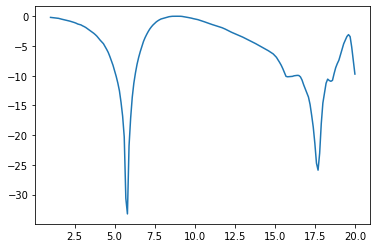

In [210]:
gp=[]
for x in freq_range:
  gp.append(list(model.predict([[  2.00,  1.75,  3.75,  0.85, x]])[0]))
plt.plot (np.arange(1, 20.1, 0.1),-1*np.array(gp))